# LastFM Input Analysis

## Setup

In [1]:
library(feather)
library(readr)
library(reshape2)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
options(repr.matrix.max.rows = 20, repr.plot.height=4.5)

## Input

In [4]:
users = read_csv("build/lastfm-users.csv")
users

Parsed with column specification:
cols(
  id = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer(),
  country = col_character()
)


id,key,gender,age,country
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22,Germany
2,00001411dc427966b17297bf4d69e7e193135d89,f,NA,Canada
3,00004d2ac9316e22dc007ab2243d6fcb239e707d,NA,NA,Germany
4,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19,Mexico
5,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28,United States
6,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20,United Kingdom
7,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17,Finland
8,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22,Poland
9,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24,Spain
10,0001399387da41d557219578fb08b12afa25ab67,m,NA,Ukraine


In [7]:
play_counts = read_feather("build/lastfm-play-counts.fth")
play_counts

user,item,count
1,1,2137
1,2,1099
1,3,897
1,4,717
1,5,706
1,6,691
1,7,545
1,8,507
1,9,424
1,10,403


## Summarize

In [10]:
user.summary = play_counts %>%
    filter(!is.na(count)) %>%
    group_by(user) %>%
    summarize(ArtistCount=n(),
              PlayCount=sum(count),
              MeanPlays=mean(count))
user.summary

user,ArtistCount,PlayCount,MeanPlays
1,49,16716,341.142857
2,51,119921,2351.392157
3,46,5770,125.434783
4,48,572,11.916667
5,49,6048,123.428571
6,50,25424,508.480000
7,49,7252,148.000000
8,55,3240,58.909091
9,48,248,5.166667
10,57,12401,217.561404


In [27]:
summary(select(user.summary, -user))

  ArtistCount       PlayCount        MeanPlays      
 Min.   :  1.00   Min.   :     1   Min.   :    1.0  
 1st Qu.: 45.00   1st Qu.:  2323   1st Qu.:   50.1  
 Median : 48.00   Median :  6020   Median :  125.1  
 Mean   : 47.94   Mean   : 10296   Mean   :  213.8  
 3rd Qu.: 51.00   3rd Qu.: 12887   3rd Qu.:  265.0  
 Max.   :149.00   Max.   :428354   Max.   :17794.6  

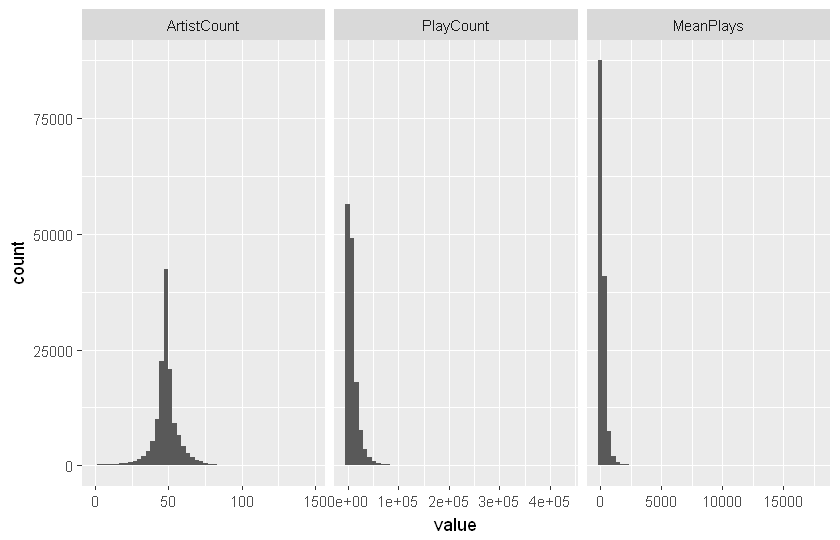

In [23]:
ggplot(melt(user.summary, id.vars = "user")) +
    aes(x=value) +
    geom_histogram(bins=50) +
    facet_grid(~ variable, scales="free")

In [11]:
artist.summary = play_counts %>%
    filter(!is.na(count)) %>%
    group_by(item) %>%
    summarize(UserCount=n(),
              PlayCount=sum(count),
              MeanPlays=mean(count))
artist.summary

item,UserCount,PlayCount,MeanPlays
1,38,6445,169.6053
2,3334,1472716,441.7265
3,360,70100,194.7222
4,592,171508,289.7095
5,516,94094,182.3527
6,18815,5182190,275.4286
7,84,17953,213.7262
8,1202,392386,326.4443
9,95,22695,238.8947
10,109,28980,265.8716


In [26]:
summary(select(artist.summary, -item))

   UserCount          PlayCount          MeanPlays       
 Min.   :    1.00   Min.   :       1   Min.   :    1.00  
 1st Qu.:    1.00   1st Qu.:      91   1st Qu.:   43.71  
 Median :    4.00   Median :     409   Median :   99.06  
 Mean   :   52.98   Mean   :   11377   Mean   :  140.24  
 3rd Qu.:   14.00   3rd Qu.:    1974   3rd Qu.:  178.00  
 Max.   :29835.00   Max.   :11736130   Max.   :16647.33  

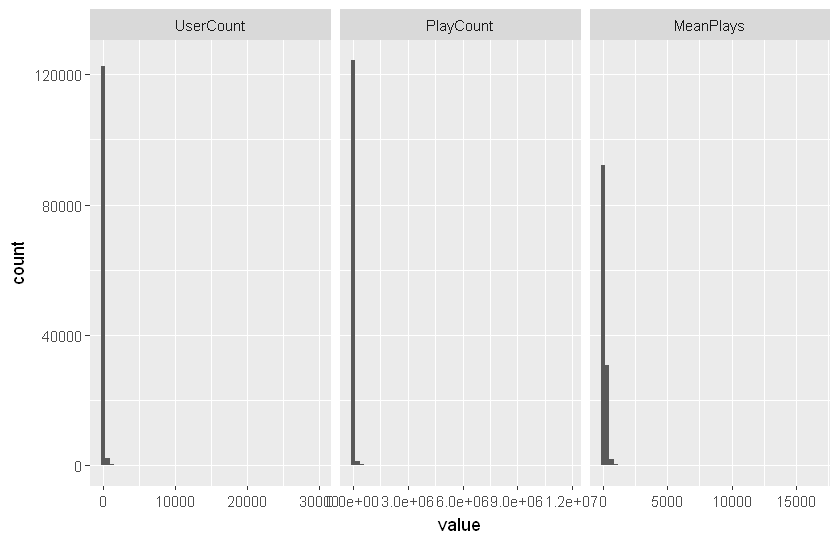

In [25]:
ggplot(melt(artist.summary, id.vars = "item")) +
    aes(x=value) +
    geom_histogram(bins=50) +
    facet_grid(~ variable, scales="free")

## Demographic Summary

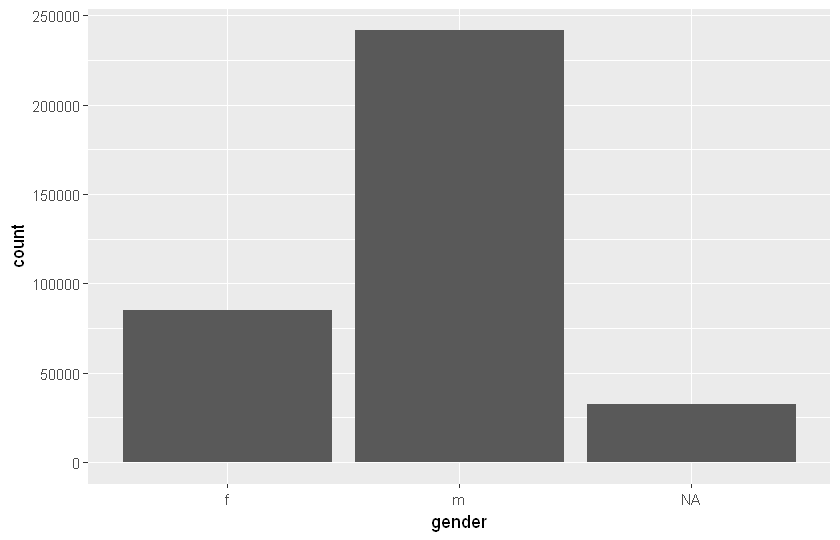

In [48]:
ggplot(users) +
    aes(x=gender) +
    geom_bar()

In [44]:
?stat_bin

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


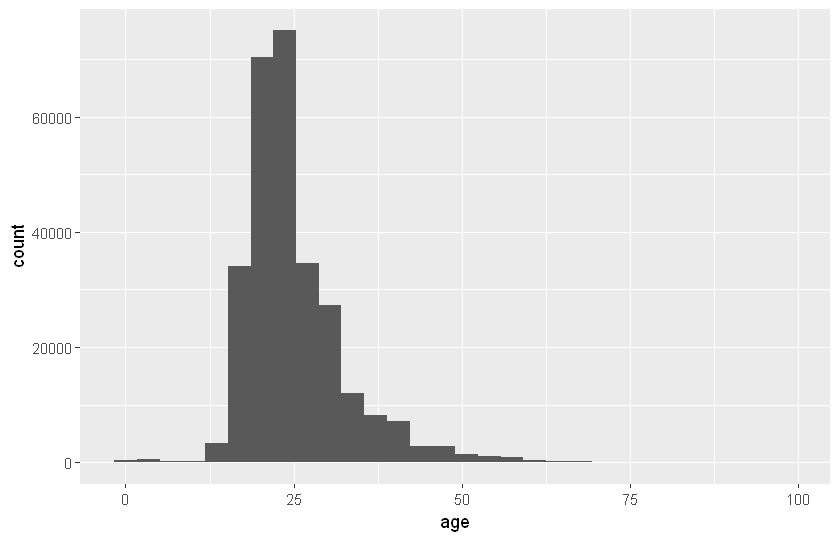

In [34]:
ggplot(users %>% filter(age >= 0, age < 100)) +
    aes(x=age) +
    geom_histogram()

## Split Summary by Demographics

In [36]:
udata = users %>% rename(user=id) %>% inner_join(user.summary)

Joining, by = "user"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


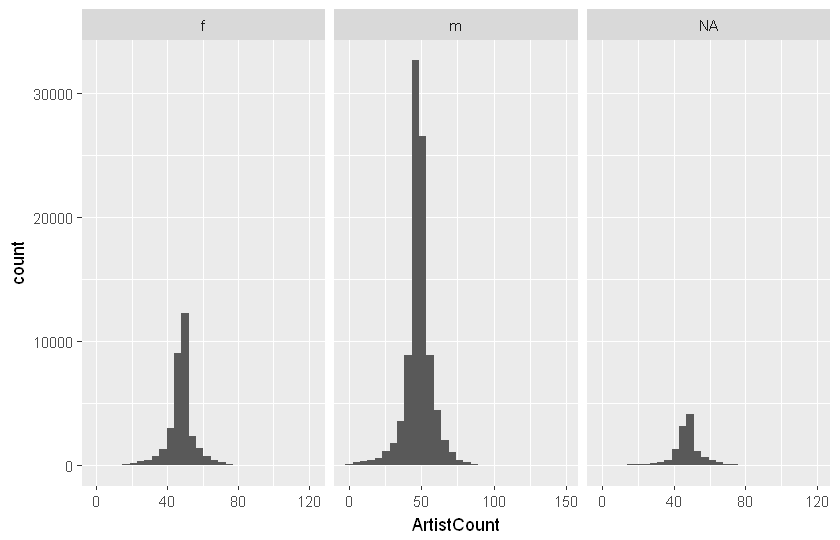

In [38]:
ggplot(udata) +
    aes(x=ArtistCount) +
    geom_histogram() +
    facet_grid(~ gender, scales="free")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


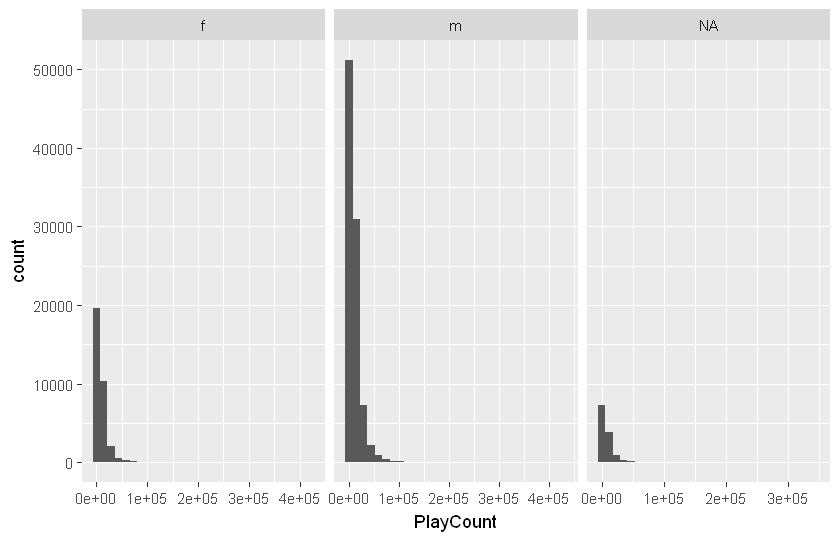

In [49]:
ggplot(udata) +
    aes(x=PlayCount) +
    geom_histogram() +
    facet_grid(~ gender, scales="free")

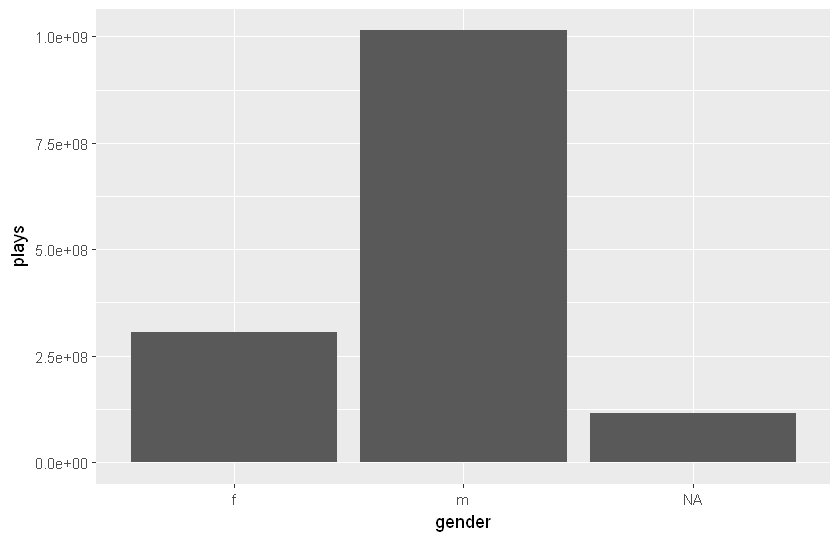

In [43]:
ggplot(udata %>% group_by(gender) %>% summarize(plays=sum(PlayCount))) +
    aes(x=gender, y=plays) +
    geom_bar(stat='identity')